In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
pendf = pdf[pdf.columns[2:-1]][:]
pendf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [ ]:
pendf[pendf.bill_length_mm.isna()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


## find missing entries in each column

In [ ]:
pendf.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [ ]:
pendf.shape[0]

344

In [ ]:
100*pendf.isna().sum()/pendf.shape[0]

bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
dtype: float64

-- Fill all missing values

In [ ]:
for col in pendf.columns:
  pendf[col]= pendf[col].fillna(pendf[col].mean())

In [ ]:
100*pendf.isna().sum()/pendf.shape[0]

bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
dtype: float64

-- Extract Train and test dataset

In [ ]:
X= pendf.iloc[:,:-1]
y= pendf.body_mass_g[:]

In [ ]:
y[:5].values

array([3750.        , 3800.        , 3250.        , 4201.75438596,
       3450.        ])

In [ ]:
y[:5].values.reshape(-1,1)

array([[3750.        ],
       [3800.        ],
       [3250.        ],
       [4201.75438596],
       [3450.        ]])

In [ ]:
X[:5].values

array([[ 39.1       ,  18.7       , 181.        ],
       [ 39.5       ,  17.4       , 186.        ],
       [ 40.3       ,  18.        , 195.        ],
       [ 43.92192982,  17.15116959, 200.91520468],
       [ 36.7       ,  19.3       , 193.        ]])

In [ ]:
X.shape,y.shape

((344, 3), (344,))

In [ ]:
X= pendf.iloc[:,:-1]
y= pendf.body_mass_g.values.reshape(-1,1)
X.shape,y.shape

((344, 3), (344, 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25, random_state=1234
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((258, 3), (86, 3), (258, 1), (86, 1))

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((258, 3), (258, 1), (86, 3), (86, 1))

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
c = lr_model.intercept_

In [ ]:
m = lr_model.coef_

In [ ]:
c,m

(array([-6387.45254408]), array([[ 1.27261251, 20.4506061 , 50.69168477]]))

In [ ]:
X_train.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')

In [ ]:
X_train.iloc[:1,:].values

array([[ 38.8,  17.2, 180. ]])

In [ ]:
y_train[:1]

array([[3800.]])

In [ ]:
m.shape,m.T,m.T.shape

((1, 3), array([[ 1.27261251],
        [20.4506061 ],
        [50.69168477]]), (3, 1))

In [ ]:
X_train.iloc[:1,:].values*10

array([[ 388.,  172., 1800.]])

In [ ]:
c+np.dot(X_train.iloc[:1,:].values,m.T)

array([[3138.17850443]])

In [ ]:
y_learnt_mf = lr_model.predict(X_train)
y_learnt_mf[:5]

array([[3138.17850443],
       [4863.2616137 ],
       [5178.91851846],
       [3673.79129772],
       [3647.03091266]])

In [ ]:
y_train[:5]

array([[3800.],
       [4850.],
       [5300.],
       [3400.],
       [3700.]])

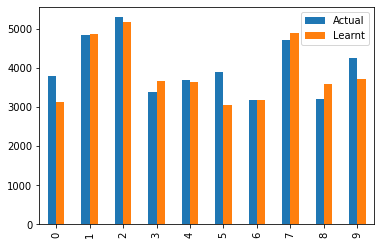

In [ ]:
df22 = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt_mf[:,0]})
df22.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse_train_mf = mse(y_train , y_learnt_mf)
mse_train_mf

155008.56207391203

In [ ]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([[3335.84591287],
       [5188.87153782],
       [3976.70431621],
       [3977.74016741],
       [3169.09117488]])

In [ ]:
mse_test_mf = mse(y_test,y_pred)
mse_test_mf

143907.66434418483

# R2 score

In [ ]:
mse_base = 802.2336451400918**2
mse_base

643578.8213947586

In [ ]:
1-(mse_test_mf/mse_base)

0.7763946550753343

In [ ]:
1-(rmse_test_sf/rmse_test_base)

NameError: ignored

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_mf = r2_score(y_test,y_pred)
r2_score_mf

0.7763945991516925